In [1]:
import sys
import math
import pickle
import numpy as np
import matplotlib.pyplot as plt
import collections

In [2]:
n = 4       # number of pixel in one column in a feature
m = 2       # number of pixel in one row in a feature
k = np.array([10**(-6), 10**(-5), 10**(-4), 0.001, 0.002, 0.005, 0.01, 0.02, 0.05])
k2 = np.linspace(0.1, 10, 100)
k = np.append(k, k2)

print(np.shape(k))

accuracy = np.zeros(109)
print(np.shape(accuracy))

(109,)
(109,)


In [3]:
def inputDigit(name="facedata/facedatatrain"):
    with open(name) as digitTxt:
        image = [list(line)[0:60] for line in digitTxt]
        rows = len(image)
    return image

In [4]:
def readRough(name="facedata/facedatatrainlabels"):
    with open(name) as label:
        labels = []
        for line in label:
            labels.append(line[0])
    return labels


In [5]:
digitImage = inputDigit()
#print(len(digitImage))
#print(len(digitImage[0]))
#print(31570/70)

In [6]:
label = readRough()
print ("len(label): " + str(len(label)))
class_ = sorted(collections.Counter(label).items())
print (class_)
with open('labelstats.txt', 'wb') as fp:
    pickle.dump(class_, fp)

len(label): 451
[('0', 234), ('1', 217)]


In [7]:
testlabels = readRough("facedata/facedatatestlabels")
testclass_ = sorted(collections.Counter(testlabels).items())

def confusion_matrix():
    conf_matrix = np.zeros(shape=(2,2))
    for i in range(150):
        conf_matrix[int(testlabels[i])][int(answer[i])] += 1
            
    for i in range(2):
        for j in range(2):
            conf_matrix[i][j] /= testclass_[i][1]
            
    print("false positive = " + str(conf_matrix[0][1]))
    print("false negative = " + str(conf_matrix[1][0]))
    return conf_matrix

In [8]:
for k_index in range(109):
    # load the number of 1(face) and 0(not face) in the training set
    with open ('labelstats.txt', 'rb') as fp:
        class_ = pickle.load(fp)

    digitImage = inputDigit()

    # training shape=(2 classes * (70-n+1)*(60-m+1) features * 2^nm feature values)
    training=np.zeros(shape=(2, 70-n+1, 60-m+1, 2**(n*m)))

    count = 0
    for i in range(451):                  # for each image
        for row in range(70-n+1):
            for col in range(60-m+1):      # for each feature

                feature_val = 0
                for y in range(n):
                    for x in range(m):      # for each pixel in feature (overlapping)
                        # calculate feature_val
                        if digitImage[i*70+row+y][col+x] != ' ':
                            feature_val += 2**(m*y+x)
                training[int(label[i])][row][col][feature_val] += 1

    for i in range(2):
        training[i] = (training[i] + k[k_index]) / (class_[i][1] + k[k_index] * 2**(m*n))

    #print(training[0][0].shape)
    #print(training[0][0])




    # MAP classification
    # posterior probability = log P(class) + log P(f1,1 | class) + log P(f1,2 | class) + ... + log P(f28,28 | class)

    test_rough = inputDigit(name = "facedata/facedatatest")
    answer = np.zeros(150)
    print(len(test_rough[0]))

    for i in range(150):                  # for each image
        test_image = np.zeros(shape=(70-n+1, 60-m+1))
        for row in range(70-n+1):
            for col in range(60-m+1):      # for each feature

                feature_val = 0
                for y in range(n):
                    for x in range(m):      # for each pixel in feature (overlapping)
                        # calculate feature_val
                        if test_rough[i*70+row+y][col+x] != ' ':
                            feature_val += 2**(m*y+x)

                test_image[row][col] = feature_val

        posteriori = np.zeros(2)
        for class_num in range(2):
            posteriori[class_num] = math.log(class_[class_num][1])
            for row in range(70-n+1):
                for col in range(60-m+1):
                    posteriori[class_num] += math.log(training[class_num][row][col][int(test_image[row][col])])
        answer[i] = np.argmax(posteriori)
        #print(posteriori)

    #print(answer)

    # print confusion matrix
    conf_matrix = confusion_matrix()
    conf_matrix = np.around(conf_matrix, 3)
    for row in conf_matrix:
        print(row)

    overall_accuracy = 0
    for i in range(2):
        overall_accuracy += conf_matrix[i][i] * testclass_[i][1]
    accuracy[k_index] = overall_accuracy
    print("overall_accuracy(k=" + str(k[k_index]) + ") = " + str(overall_accuracy/150))

60
false positive = 0.012987012987
false negative = 0.13698630137
[ 0.987  0.013]
[ 0.137  0.863]
overall_accuracy(k=1e-06) = 0.926653333333
60
false positive = 0.012987012987
false negative = 0.109589041096
[ 0.987  0.013]
[ 0.11  0.89]
overall_accuracy(k=1e-05) = 0.939793333333
60
false positive = 0.012987012987
false negative = 0.0821917808219
[ 0.987  0.013]
[ 0.082  0.918]
overall_accuracy(k=0.0001) = 0.95342
60
false positive = 0.012987012987
false negative = 0.041095890411
[ 0.987  0.013]
[ 0.041  0.959]
overall_accuracy(k=0.001) = 0.973373333333
60
false positive = 0.012987012987
false negative = 0.027397260274
[ 0.987  0.013]
[ 0.027  0.973]
overall_accuracy(k=0.002) = 0.980186666667
60
false positive = 0.012987012987
false negative = 0.027397260274
[ 0.987  0.013]
[ 0.027  0.973]
overall_accuracy(k=0.005) = 0.980186666667
60
false positive = 0.012987012987
false negative = 0.013698630137
[ 0.987  0.013]
[ 0.014  0.986]
overall_accuracy(k=0.01) = 0.986513333333
60
false positi

In [9]:
with open('k_face_4x2.txt', 'wb') as fp:
    pickle.dump(accuracy, fp)

In [10]:
with open ('k_face_4x2.txt', 'rb') as fp:
    accuracy2 = pickle.load(fp)

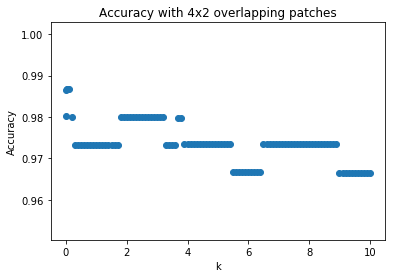

In [11]:
%matplotlib inline
plt.figure()
ax = plt.gca()
#ax.set_xscale('log')
plt.scatter(k[5:], accuracy2[5:]/150, label = 'f(x)')
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Accuracy with 4x2 overlapping patches")